## 1.

### a.

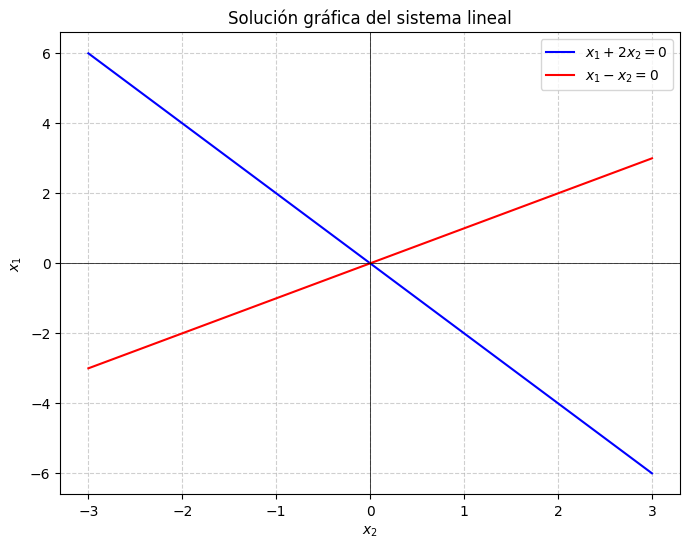

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Definir valores de x2
x2 = np.linspace(-3, 3, 100)

# Ecuaciones de las rectas
x1_1 = -2 * x2  # x1 = -2x2
x1_2 = x2       # x1 = x2

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x2, x1_1, label='$x_1 + 2x_2 = 0$', color='blue')
plt.plot(x2, x1_2, label='$x_1 - x_2 = 0$', color='red')

# Configuración del gráfico
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('$x_2$')
plt.ylabel('$x_1$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.title('Solución gráfica del sistema lineal')
plt.show()


### b.

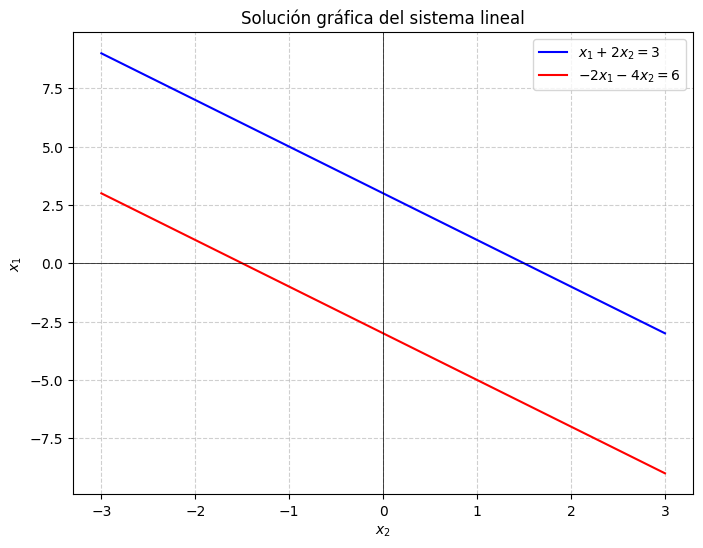

In [118]:
# Definir las ecuaciones
x1_1 = 3 - 2 * x2  # Ecuación 1: x1 = 3 - 2x2
x1_2 = -3 -2*x2 

# Graficar las rectas
plt.figure(figsize=(8, 6))
plt.plot(x2, x1_1, label='$x_1 + 2x_2 = 3$', color='blue')
plt.plot(x2, x1_2, label='$-2x_1 - 4x_2 = 6$', color='red')

# Configuración del gráfico
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('$x_2$')
plt.ylabel('$x_1$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.title('Solución gráfica del sistema lineal')
plt.show()

### c.

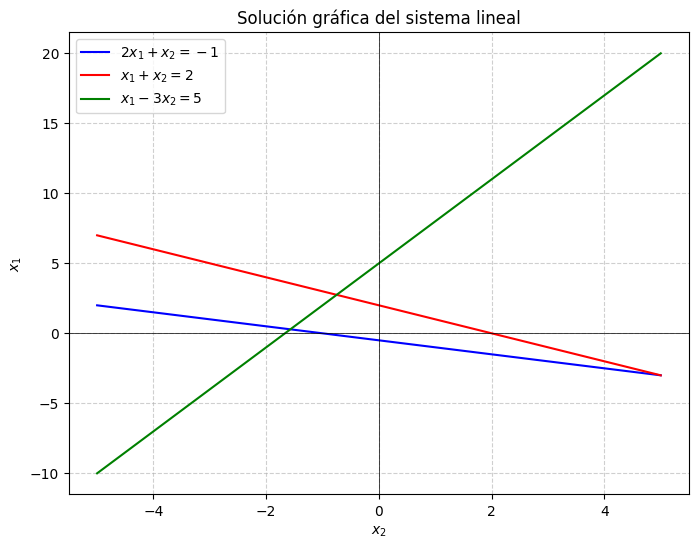

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores para x2
x2 = np.linspace(-5, 5, 100)

# Definir las ecuaciones
x1_1 = (-1 - x2) / 2  # Ecuación 1: 2x1 + x2 = -1  => x1 = (-1 - x2) / 2
x1_2 = 2 - x2         # Ecuación 2: x1 + x2 = 2    => x1 = 2 - x2
x1_3 = (5 + 3 * x2)   # Ecuación 3: x1 - 3x2 = 5   => x1 = 5 + 3x2

# Graficar las rectas
plt.figure(figsize=(8, 6))
plt.plot(x2, x1_1, label='$2x_1 + x_2 = -1$', color='blue')
plt.plot(x2, x1_2, label='$x_1 + x_2 = 2$', color='red')
plt.plot(x2, x1_3, label='$x_1 - 3x_2 = 5$', color='green')

# Configuración del gráfico
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('$x_2$')
plt.ylabel('$x_1$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.title('Solución gráfica del sistema lineal')
plt.show()

### d.

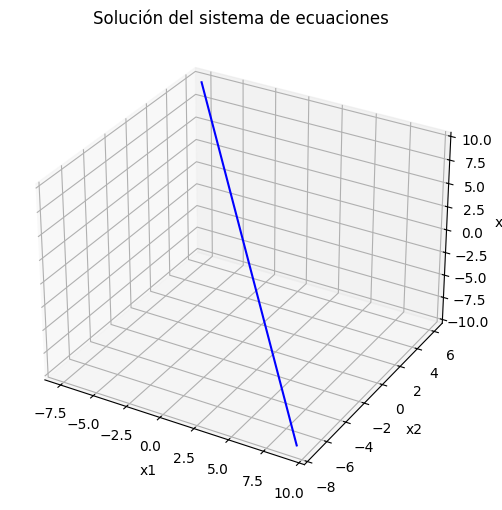

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el rango de x3
x3_vals = np.linspace(-10, 10, 400)

# Calculamos x1 y x2 en función de x3
x1_vals = (5 - 5 * x3_vals) / 6
x2_vals = (2 * x3_vals - 2) / 3

# Graficamos la solución paramétrica
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_vals, x2_vals, x3_vals, label='Solución del sistema', color='b')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Solución del sistema de ecuaciones')

plt.show()


## 2.

In [121]:
import numpy as np
import logging

def eliminacion_gaussiana2(A: np.ndarray, decimales: int = None) -> np.ndarray:
    
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # Redondear matriz después del pivoteo
        if decimales is not None:
            A = np.round(A, decimales)

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

            # Redondear matriz después de cada operación elemental
            if decimales is not None:
                A[j, i:] = np.round(A[j, i:], decimales)

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    if decimales is not None:
        solucion[n - 1] = np.round(solucion[n - 1], decimales)

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

        # Redondear soluciones parciales
        if decimales is not None:
            solucion[i] = np.round(solucion[i], decimales)

    return solucion


### a)

$$-x_1 + 4x_2 + x_3 = 8$$

$$\frac{5}{3}x_1 + \frac{2}{3}x_2 - \frac{2}{3}x_3= 1$$

$$2x_1 + x_2 + 4x_3 = 11$$


In [122]:
import numpy as np

Ab =[[-1, 4, 1,8],
     [5/3, 2/3, 2/3, 1],
     [2, 1, 4,11]]

#eliminacion_gaussiana(Ab)

# Ejecutar la eliminación gaussiana con redondeo a 2 decimales
solucion = eliminacion_gaussiana2(Ab,2)

print("\nSolución redondeada durante el cálculo:", solucion)

[01-10 21:34:57][INFO] 
[[-1.    4.    1.    8.  ]
 [ 0.    7.35  2.34 14.36]
 [ 0.    9.    6.   27.  ]]
[01-10 21:34:57][INFO] 
[[-1.    4.    1.    8.  ]
 [ 0.    7.35  2.34 14.36]
 [ 0.    0.    3.13  9.42]]

Solución redondeada durante el cálculo: [-0.99  1.    3.01]


### b)

$$4x_1 + 2x_2 - x_3 = -5$$

$$\frac{1}{9}x_1 + \frac{1}{9}x_2 - \frac{1}{3}x_3= -1$$

$$x_1 + 4x_2 + 2x_3 = 9$$

In [123]:
Ab = [[4, 2, -1, -5],
       [1/9, 1/9, -1/3, -1],
       [1, 4, 2, 9]]

# Ejecutar la eliminación gaussiana con redondeo a 2 decimales
solucion = eliminacion_gaussiana2(Ab,2)

print("\nSolución redondeada durante el cálculo:", solucion)

[01-10 21:34:57][INFO] 
[[ 0.11  0.11 -0.33 -1.  ]
 [ 0.   -2.   11.   31.36]
 [ 0.    3.    5.   18.09]]
[01-10 21:34:57][INFO] 
[[ 0.11  0.11 -0.33 -1.  ]
 [ 0.   -2.   11.   31.36]
 [ 0.    0.   21.5  65.13]]

Solución redondeada durante el cálculo: [-0.98  0.98  3.03]


## 3.

In [124]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
%autoreload 2

from src import eliminacion_gaussiana

### a.

$$x_1 - x_2 + 3x_3 = 2$$

$$3x_1 - 3x_2 + 1x_3= - 1$$

$$x_1 + x_2  = 3$$

In [126]:
Ab = [
    [1, -1, 3, 2],
    [3, -3, 1, -1],
    [1, 1, 0, 3]
]

eliminacion_gaussiana(Ab)

[01-10 21:34:58][INFO] 
[[ 1 -1  3  2]
 [ 0  0 -8 -7]
 [ 0  2 -3  1]]
[01-10 21:34:58][INFO] 
[[ 1 -1  3  2]
 [ 0  2 -3  1]
 [ 0  0 -8 -7]]


array([1.1875, 1.8125, 0.875 ])

### b.

$$2x_1 - 1.5x_2 + 3x_3 = 1$$

$$-x_1 + 2x_3 = 3$$

$$4x_1 - 4.5x_2 + 5x_3 = 1$$

In [127]:
Ab = [
    [2, -1.5, 3, 1],
    [-1, 0, 2, 3],
    [4, -4.5, 5, 1]
]

eliminacion_gaussiana(Ab)

[01-10 21:34:58][INFO] 
[[-1.   0.   2.   3. ]
 [ 0.  -1.5  7.   7. ]
 [ 0.  -4.5 13.  13. ]]
[01-10 21:34:58][INFO] 
[[-1.   0.   2.   3. ]
 [ 0.  -1.5  7.   7. ]
 [ 0.   0.  -8.  -8. ]]


array([-1., -0.,  1.])

### c.

$$2x_1 = 3$$

$$x_1 + 1.5x_2= 4.5$$

$$- 3x_2 - 0.5x_3 = -6.6$$

$$2x_1 - 2x_2 + x_3 + x_4 = 0.8$$

In [128]:
Ab = [
    [2, 0, 0, 0, 3],
    [1, 1.5, 0, 0, 4.5],
    [0, -3, 0.5, 0, -6.6],
    [2, -2, 1, 1, 0.8]
]

eliminacion_gaussiana(Ab)

[01-10 21:34:58][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.  -5.   1.   1.  -8.2]]
[01-10 21:34:58][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   1.   1.   1.8]]
[01-10 21:34:58][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   0.   1.   3. ]]


array([ 1.5,  2. , -1.2,  3. ])

### d.

$$x_1 + x_2 + x_4 = 2$$

$$2x_1 + x_2 - x_3 + x_4 = 1$$

$$4x_1 - x_2 - 2x_3 + 2x_4 = 0$$

$$3x_1 - x_2 - x_3 + 2x_4 = -3$$

In [129]:
Ab = [
    [1, 1, 0, 1, 2],
    [2, 1, -1, 1, 1],
    [4, -1, -2, 2, 0],
    [3, -1, -1, 2, -3]
]

eliminacion_gaussiana(Ab)

[01-10 21:34:58][INFO] 
[[ 1  1  0  1  2]
 [ 0 -1 -1 -1 -3]
 [ 0 -5 -2 -2 -8]
 [ 0 -4 -1 -1 -9]]
[01-10 21:34:58][INFO] 
[[ 1  1  0  1  2]
 [ 0 -1 -1 -1 -3]
 [ 0  0  3  3  7]
 [ 0  0  3  3  3]]
[01-10 21:34:58][INFO] 
[[ 1  1  0  1  2]
 [ 0 -1 -1 -1 -3]
 [ 0  0  3  3  7]
 [ 0  0  0  0 -4]]


ValueError: No existe solución única.

## 4.

### a.


$$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9$$

$$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3= 8$$

$$\frac{1}{2}x_1 + x_2 + 2x_3 = 8$$


In [130]:
Ab = np.array([[1/4, 1/5, 1/6, 9],
              [1/3, 1/4, 1/5, 8],
              [1/2, 1, 2, 8]], dtype=np.float32)

eliminacion_gaussiana(Ab)

[01-10 21:35:33][INFO] 
[[  0.25         0.2          0.16666667   9.        ]
 [  0.          -0.01666668  -0.02222224  -4.        ]
 [  0.           0.6          1.6666666  -10.        ]]
[01-10 21:35:33][INFO] 
[[ 2.5000000e-01  2.0000000e-01  1.6666667e-01  9.0000000e+00]
 [ 0.0000000e+00 -1.6666681e-02 -2.2222236e-02 -4.0000000e+00]
 [ 0.0000000e+00 -5.9604645e-08  8.6666673e-01 -1.5399989e+02]]


array([-227.07666725,  476.92263902, -177.69216919])

### b.

$$3.333x_1 + 15920x_2 - 10.333x_3 = 15913$$

$$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$$

$$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254$$


In [131]:
Ab = np.array([[3.333, 15920, 10.333, 15913],
              [2.222, 16.71, 9.612, 28.544],
              [1.5611, 5.1791, 1.6852, 8.4254]],  dtype=np.float32)

eliminacion_gaussiana(Ab)

[01-10 21:35:33][INFO] 
[[1.5611000e+00 5.1791000e+00 1.6852000e+00 8.4253998e+00]
 [0.0000000e+00 9.3383007e+00 7.2133622e+00 1.6551662e+01]
 [0.0000000e+00 1.5908942e+04 6.7350426e+00 1.5895012e+04]]
[01-10 21:35:33][INFO] 
[[ 1.5611000e+00  5.1791000e+00  1.6852000e+00  8.4253998e+00]
 [ 0.0000000e+00  9.3383007e+00  7.2133622e+00  1.6551662e+01]
 [ 0.0000000e+00  0.0000000e+00 -1.2282113e+04 -1.2302777e+04]]


array([1.00249532, 0.99870038, 1.0016824 ])

### c.


$$x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}$$

$$\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}$$

$$\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}$$

$$\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}$$

In [132]:
Ab = np.array([[1, 1/2, 1/3, 1/4, 1/6],
              [1/2, 1/3, 1/4, 1/5, 1/7],
              [1/3, 1/4, 1/5, 1/6, 1/8],
              [1/4, 1/5, 1/6, 1/7, 1/9]], dtype=np.float32)

eliminacion_gaussiana(Ab)

[01-10 21:35:33][INFO] 
[[ 0.25        0.2         0.16666667  0.14285715  0.11111111]
 [ 0.         -0.06666666 -0.08333334 -0.0857143  -0.07936507]
 [ 0.         -0.01666668 -0.02222224 -0.02380954 -0.02314815]
 [ 0.         -0.3        -0.33333334 -0.3214286  -0.2777778 ]]
[01-10 21:35:33][INFO] 
[[ 2.5000000e-01  2.0000000e-01  1.6666667e-01  1.4285715e-01
   1.1111111e-01]
 [ 0.0000000e+00 -1.6666681e-02 -2.2222236e-02 -2.3809537e-02
  -2.3148149e-02]
 [ 0.0000000e+00  0.0000000e+00  5.5555180e-03  9.5237717e-03
   1.3227440e-02]
 [ 0.0000000e+00  2.9802322e-08  6.6666603e-02  1.0714275e-01
   1.3888860e-01]]
[01-10 21:35:33][INFO] 
[[ 2.5000000e-01  2.0000000e-01  1.6666667e-01  1.4285715e-01
   1.1111111e-01]
 [ 0.0000000e+00 -1.6666681e-02 -2.2222236e-02 -2.3809537e-02
  -2.3148149e-02]
 [ 0.0000000e+00  0.0000000e+00  5.5555180e-03  9.5237717e-03
   1.3227440e-02]
 [ 0.0000000e+00  2.9802322e-08  0.0000000e+00 -7.1431771e-03
  -1.9841611e-02]]


array([-0.03174083,  0.5951854 , -2.3808313 ,  2.77770114])

### d.

$$2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$$

$$x_1 + 2x_3 - x_4 + x_5 = 2$$

$$- 2x_2 - x_3 + x_4 - x_5 = -5$$

$$3x_1 + x_2 - 4x_3 + 5x_5 = 6$$

$$x_1 - x_2 - x_3 - x_4 + x_5= -3$$

In [133]:
Ab = np.array([[2, 1, -1, 1, -3, 7],
              [1, 0, 2, -1, 1, 2],
              [0, -2, -1, 1, -1, -5],
              [3, 1, -4, 0, 5, 6],
              [1, -1, -1, -1, 1, -3]], dtype=np.float32)

eliminacion_gaussiana(Ab)

[01-10 21:35:34][INFO] 
[[  1.   0.   2.  -1.   1.   2.]
 [  0.   1.  -5.   3.  -5.   3.]
 [  0.  -2.  -1.   1.  -1.  -5.]
 [  0.   1. -10.   3.   2.   0.]
 [  0.  -1.  -3.   0.   0.  -5.]]
[01-10 21:35:34][INFO] 
[[  1.   0.   2.  -1.   1.   2.]
 [  0.   1.  -5.   3.  -5.   3.]
 [  0.   0. -11.   7. -11.   1.]
 [  0.   0.  -5.   0.   7.  -3.]
 [  0.   0.  -8.   3.  -5.  -2.]]
[01-10 21:35:34][INFO] 
[[  1.          0.          2.         -1.          1.          2.       ]
 [  0.          1.         -5.          3.         -5.          3.       ]
 [  0.          0.         -5.          0.          7.         -3.       ]
 [  0.          0.          0.          7.        -26.400002    7.6000004]
 [  0.          0.          0.          3.        -16.2         2.8000002]]
[01-10 21:35:34][INFO] 
[[  1.          0.          2.         -1.          1.          2.       ]
 [  0.          1.         -5.          3.         -5.          3.       ]
 [  0.          0.         -5.          0.    

array([1.88304105, 2.80701722, 0.73099417, 1.43859666, 0.09356727])

## 5.

El sistema se representa como:
$$\begin{bmatrix}
\begin{array}{r@{\hspace{0.5cm}}c@{\hspace{0.5cm}}r@{\hspace{0.5cm}}|r}
1 & -1 & \alpha  & | & -2 \\
-1 & 2 & -\alpha & | & 3 \\
\alpha & 1 & 1  & | & 2
\end{array}
\end{bmatrix}$$

Para resolver este sistema por eliminación de Gauss, realizaremos operaciones sobre las filas de la matriz aumentada.

*Primera operación:* $F_1 + F_2 → F_2$

En esta operación, se suman la fila 1 ($F_1$) y la fila 2 ($F_2$) y el resultado se coloca en la fila 2. Esto elimina el término $x_1$ en la fila 2:

$F_2=F_1 + F_2$

Al hacer la suma de las filas, obtenemos la nueva fila 2:
$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
0 & 1 & 0 & | & 1 \\
\alpha & 1 & 1 & | & 2
\end{bmatrix}$$

Luego eliminamos el elemento 𝛼en la fila 3, columna 1:

Se resta 𝛼 veces la fila 1 de la fila 3.

Esto hace que el primer elemento de la fila 3 se convierta en 0, eliminando 𝛼 en esa posición.

Despues eliminamos el elemento $(1+𝛼)$ en la fila 3, columna 2:
Se resta 
$(1+𝛼)$ veces la fila 2 de la fila 3. Esto hace que el segundo elemento de la fila 3 se convierta en 0, eliminando 
$1+α$ en esa posición.

La matriz se transforma en una forma triangular superior lista para aplicar sustitución hacia atrás.

$$\begin{pmatrix} 1 & -1 & \alpha & | &-2 \\ 0 & 1 & 0 & | & 1 \\ 0 & 0 & (1 - \alpha^{2}) & |&2+\alpha  \end{pmatrix}$$

## 6. 
Suponga que en un sistema biológico existen $n$ especies de animales y $m$ fuentes de alimento. Si $x_j$ representa la 
población de las j-ésimas especies, para cada $j = 1, ... , n$,;$b_i$; representa el suministro diario disponible del i-ésimo
alimento $a_{ij}$𝑗 representa la cantidad del i-ésimo alimento

$$
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1,
\quad
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2,
\quad
\dots,
\quad
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m.
$$

representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.

### a.
Si
$$
A=[a_ij]= \begin{bmatrix}
1 & 2 & 0 \\
1 & 0 & 2 \\
0 & 0 & 1
\end{bmatrix},
\quad
\mathbf{x=[x_j]} = \begin{bmatrix}
1000 \\
500 \\
350
\end{bmatrix},
\quad
\mathbf{b=[b_i]} = \begin{bmatrix}
3500 \\
2700 \\
900
\end{bmatrix},
$$
¿Existe suficiente alimento para satisfacer el consumo promedio diario?

In [134]:
# Datos de entrada
A = np.array([
    [1, 2, 0],
    [1, 0, 2],
    [0, 0, 1]
], dtype=int)

x = np.array([1000, 500, 350], dtype=float)  # Población de cada especie
b = np.array([3500, 2700, 900], dtype=float)  # Disponibilidad de cada recurso

In [135]:
import numpy as np

def verificar_suficiencia_alimento(A: np.ndarray, x: np.ndarray, b: np.ndarray):
    """
    Verifica si el suministro de alimentos es suficiente para satisfacer el consumo promedio diario.

    ## Parámetros
    - `A`: Matriz de consumo de recursos por especie (m x n).
    - `x`: Vector de poblaciones de especies (n,).
    - `b`: Vector de disponibilidad de recursos (m,).

    ## Salida
    - Mensaje indicando si el alimento es suficiente o no.
    - Cantidades sobrantes o faltantes para cada recurso.
    """
    # Validaciones de dimensiones
    assert A.shape[1] == x.shape[0], "El número de columnas en A debe coincidir con el tamaño de x."
    assert A.shape[0] == b.shape[0], "El número de filas en A debe coincidir con el tamaño de b."

    # Cálculo del consumo total actual
    consumo_total = A @ x # el operador @ en Python se emplea para realizar multiplicación de matrices 

    # Comparación con disponibilidad
    recursos_restantes = b - consumo_total

    print("Disponibilidad los recursos--->(b):")
    print(b)
    print("\nConsumo de los recursos:")
    print(consumo_total)
    

    # Evaluación de suficiencia
    if np.all(recursos_restantes >= 0):
        print("\nSí: el alimento alcanza para cubrir el consumo promedio diario.")
        print("    Sobran cantidades (recurso a recurso):", recursos_restantes)
    else:
        print("\nNo: el alimento NO alcanza para cubrir el consumo promedio diario.")
        faltante_recursos = np.where(recursos_restantes < 0, -recursos_restantess, 0)
        print("    Faltan cantidades (recurso a recurso):", faltante_recursos)

# Llamada a la función
verificar_suficiencia_alimento(A, x, b)

Disponibilidad los recursos--->(b):
[3500. 2700.  900.]

Consumo de los recursos:
[2000. 1700.  350.]

Sí: el alimento alcanza para cubrir el consumo promedio diario.
    Sobran cantidades (recurso a recurso): [1500. 1000.  550.]


### b. 
¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?

In [136]:
# Consumo total actual
consumo_total = A @ x

# Recursos restantes disponibles
recursos_restantes = b - consumo_total

# Número máximo de animales adicionales por especie
max_animales_adicionales = []

for j in range(A.shape[1]):  # Iterar por cada especie
    limites_por_recursos = []
    for i in range(A.shape[0]):  # Iterar por cada recurso
        if A[i, j] > 0:
            limite = recursos_restantes[i] / A[i, j]
            limites_por_recursos.append(limite)
    
    # El número máximo de animales adicionales está limitado por el recurso más restrictivo
    max_adicional = min(limites_por_recursos) if limites_por_recursos else float('inf')
    max_animales_adicionales.append(max_adicional)

# Resultados
print("Número máximo de animales adicionales por especie:")
for i, max_add in enumerate(max_animales_adicionales):
    print(f"Especie {i+1}: {int(max_add)} animales adicionales (máximo)")

Número máximo de animales adicionales por especie:
Especie 1: 1000 animales adicionales (máximo)
Especie 2: 750 animales adicionales (máximo)
Especie 3: 500 animales adicionales (máximo)


### c. 
Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [137]:
# Consumo actual
consumo_actual = A @ x

# Recursos restantes si la especie 1 se extingue
especie_extinta = 0  # Índice de la especie que se extingue (especie 1)
consumo_extinto = A[:, especie_extinta] * x[especie_extinta]  # Consumo de la especie extinta
recursos_restantes = b - (consumo_actual - consumo_extinto)  # Recursos disponibles tras la extinción

# Matriz A reducida (sin la columna de la especie extinta)
A_reducida = np.delete(A, especie_extinta, axis=1)

# Calcular el número máximo de animales adicionales para las especies restantes
max_animales_adicionales = []

for j in range(A_reducida.shape[1]):  # Iterar por cada especie restante
    limites_por_recursos = []
    for i in range(A_reducida.shape[0]):  # Iterar por cada recurso
        if A_reducida[i, j] > 0:
            limite = recursos_restantes[i] / A_reducida[i, j]
            limites_por_recursos.append(limite)
    
    # El número máximo de animales adicionales está limitado por el recurso más restrictivo
    max_adicional = min(limites_por_recursos) if limites_por_recursos else float('inf')
    max_animales_adicionales.append(max_adicional)

# Resultados
print(f"Recursos restantes tras la extinción de la especie {especie_extinta + 1}:")
print(recursos_restantes)

print("\nNúmero máximo de animales adicionales por especie restante:")
for i, max_add in enumerate(max_animales_adicionales):
    print(f"Especie {i + 2}: {int(max_add)} animales adicionales (máximo)")  # Las especies restantes son 2 y 3

Recursos restantes tras la extinción de la especie 1:
[2500. 2000.  550.]

Número máximo de animales adicionales por especie restante:
Especie 2: 1250 animales adicionales (máximo)
Especie 3: 550 animales adicionales (máximo)


### d.
Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [138]:
# Consumo actual
consumo_actual = A @ x

# Recursos restantes si la especie 1 se extingue
especie_extinta = 1  # Índice de la especie que se extingue (especie 2)
consumo_extinto = A[:, especie_extinta] * x[especie_extinta]  # Consumo de la especie extinta
recursos_restantes = b - (consumo_actual - consumo_extinto)  # Recursos disponibles tras la extinción

# Matriz A reducida (sin la columna de la especie extinta)
A_reducida = np.delete(A, especie_extinta, axis=1)

# Calcular el número máximo de animales adicionales para las especies restantes
max_animales_adicionales = []

for j in range(A_reducida.shape[1]):  # Iterar por cada especie restante
    limites_por_recursos = []
    for i in range(A_reducida.shape[0]):  # Iterar por cada recurso
        if A_reducida[i, j] > 0:
            limite = recursos_restantes[i] / A_reducida[i, j]
            limites_por_recursos.append(limite)
    
    # El número máximo de animales adicionales está limitado por el recurso más restrictivo
    max_adicional = min(limites_por_recursos) if limites_por_recursos else float('inf')
    max_animales_adicionales.append(max_adicional)

# Resultados
print(f"Recursos restantes tras la extinción de la especie {especie_extinta + 1}:")
print(recursos_restantes)

print("\nNúmero máximo de animales adicionales por especie restante:")
for i, max_add in enumerate(max_animales_adicionales):
    print(f"Especie {i + 2}: {int(max_add)} animales adicionales (máximo)")  # Las especies restantes son 1 y 3

Recursos restantes tras la extinción de la especie 2:
[2500. 1000.  550.]

Número máximo de animales adicionales por especie restante:
Especie 2: 1000 animales adicionales (máximo)
Especie 3: 500 animales adicionales (máximo)


## 7.

In [139]:
import numpy as np
import logging

def gauss_jordan(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de Gauss-Jordan.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(n):
        # --- Escalamiento: Hacer el pivote igual a 1
        if A[i, i] == 0:
            # Buscar fila con elemento no nulo en la columna i
            for k in range(i + 1, n):
                if A[k, i] != 0:
                    logging.debug(f"Intercambiando filas {i} y {k}")
                    A[[i, k]] = A[[k, i]]
                    break
            else:
                raise ValueError("No existe solución única.")

        # Escalar la fila para que el pivote sea 1
        logging.debug(f"Escalando fila {i}")
        A[i, :] = A[i, :] / A[i, i]

        # --- Eliminación: Hacer ceros en la columna i para todas las demás filas
        for j in range(n):
            if j != i:
                factor = A[j, i]
                logging.debug(f"Haciendo cero en la posición ({j}, {i})")
                A[j, :] -= factor * A[i, :]

        logging.info(f"\n{A}")

    # Extraer la solución del sistema
    solucion = A[:, -1]
    return solucion

### a.

In [140]:
Ab = [[1/4, 1/5, 1/6, 9],
      [1/3, 1/4, 1/5, 8],
      [1/2, 1, 2, 8]]

gauss_jordan(Ab)

[01-10 21:35:35][INFO] 
[[ 1.00000000e+00  8.00000000e-01  6.66666667e-01  3.60000000e+01]
 [ 0.00000000e+00 -1.66666667e-02 -2.22222222e-02 -4.00000000e+00]
 [ 0.00000000e+00  6.00000000e-01  1.66666667e+00 -1.00000000e+01]]
[01-10 21:35:35][INFO] 
[[   1.            0.           -0.4        -156.        ]
 [  -0.            1.            1.33333333  240.        ]
 [   0.            0.            0.86666667 -154.        ]]
[01-10 21:35:35][INFO] 
[[   1.            0.            0.         -227.07692308]
 [  -0.            1.            0.          476.92307692]
 [   0.            0.            1.         -177.69230769]]


array([-227.07692308,  476.92307692, -177.69230769])

### b.

In [141]:
Ab = [[3.333, 15920, 10.333, 15913],
      [2.222, 16.71, 9.612, 28.544],
      [1.5611, 5.1791, 1.6852, 8.4254]]

gauss_jordan(Ab)

[01-10 21:35:35][INFO] 
[[ 1.00000000e+00  4.77647765e+03  3.10021002e+00  4.77437744e+03]
 [ 0.00000000e+00 -1.05966233e+04  2.72333333e+00 -1.05801227e+04]
 [ 0.00000000e+00 -7.45138016e+03 -3.15453786e+00 -7.44485522e+03]]
[01-10 21:35:35][INFO] 
[[ 1.00000000e+00  0.00000000e+00  4.32776529e+00  5.33754284e+00]
 [-0.00000000e+00  1.00000000e+00 -2.57000107e-04  9.98442837e-01]
 [ 0.00000000e+00  0.00000000e+00 -5.06954336e+00 -5.07807342e+00]]
[01-10 21:35:35][INFO] 
[[ 1.          0.          0.          1.00249561]
 [-0.          1.          0.          0.99870027]
 [-0.         -0.          1.          1.00168261]]


array([1.00249561, 0.99870027, 1.00168261])

### c.

In [142]:
Ab = [[1, 1/2, 1/3, 1/4, 1/6],
      [1/2, 1/3, 1/4, 1/5, 1/7],
      [1/3, 1/4, 1/5, 1/6, 1/8],
      [1/4, 1/5, 1/6, 1/7, 1/9]]

gauss_jordan(Ab)

[01-10 21:35:35][INFO] 
[[1.         0.5        0.33333333 0.25       0.16666667]
 [0.         0.08333333 0.08333333 0.075      0.05952381]
 [0.         0.08333333 0.08888889 0.08333333 0.06944444]
 [0.         0.075      0.08333333 0.08035714 0.06944444]]
[01-10 21:35:35][INFO] 
[[ 1.          0.         -0.16666667 -0.2        -0.19047619]
 [ 0.          1.          1.          0.9         0.71428571]
 [ 0.          0.          0.00555556  0.00833333  0.00992063]
 [ 0.          0.          0.00833333  0.01285714  0.01587302]]
[01-10 21:35:35][INFO] 
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-02
   1.07142857e-01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -6.00000000e-01
  -1.07142857e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.50000000e+00
   1.78571429e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.57142857e-04
   9.92063492e-04]]
[01-10 21:35:35][INFO] 
[[ 1.          0.          0.          0.         -0.03174603]
 [ 0.         

array([-0.03174603,  0.5952381 , -2.38095238,  2.77777778])

### d.

In [143]:
Ab = [[2, 1, -1, 1, -3, 7],
      [1, 0, 2, -1, 1, 2],
      [0, -2, -1, 1, -1, -5],
      [3, 1, -4, 0, 5, 6],
      [1, -1, -1, -1, 1, -3]]

gauss_jordan(Ab)

[01-10 21:35:36][INFO] 
[[ 1  0  0  0 -1  3]
 [ 0  0  2 -1  2 -1]
 [ 0 -2 -1  1 -1 -5]
 [ 0  1 -4  0  8 -3]
 [ 0 -1 -1 -1  2 -6]]
[01-10 21:35:36][INFO] 
[[ 1  0  0  0 -1  3]
 [ 0  1  0  0  0  2]
 [ 0  0  2 -1  2 -1]
 [ 0  0 -4  0  8 -5]
 [ 0  0 -1 -1  2 -4]]
[01-10 21:35:36][INFO] 
[[ 1  0  0  0 -1  3]
 [ 0  1  0  0  0  2]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0 12 -5]
 [ 0  0  0 -1  3 -4]]
[01-10 21:35:36][INFO] 
[[ 1  0  0  0 -1  3]
 [ 0  1  0  0  0  2]
 [ 0  0  1  0  1  0]
 [ 0  0  0  1 -3  4]
 [ 0  0  0  0 12 -5]]
[01-10 21:35:36][INFO] 
[[1 0 0 0 0 3]
 [0 1 0 0 0 2]
 [0 0 1 0 0 0]
 [0 0 0 1 0 4]
 [0 0 0 0 1 0]]


array([3, 2, 0, 4, 0])